In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.rename(columns={'Genre':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)

In [6]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().sum()

CustomerID    0
gender        0
age           0
income        0
score         0
dtype: int64

In [9]:
df.shape

(200, 5)

In [10]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


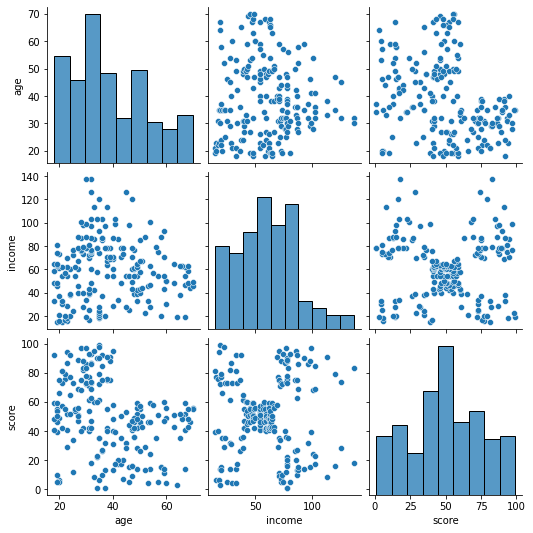

In [11]:
sbn.pairplot(df[['age','income','score']])

In [12]:
x=df.iloc[:,2:4]

In [13]:
x

,age,income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [14]:
y=df.score

In [15]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: score, Length: 200, dtype: int64

In [18]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(df[['age','score']])
kmeans.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [17]:
df['age_cluster']=kmeans.labels_

In [19]:
df

,CustomerID,gender,age,income,score,age_cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


In [20]:
df['age_cluster'].value_counts()

1    115
0     85
Name: age_cluster, dtype: int64

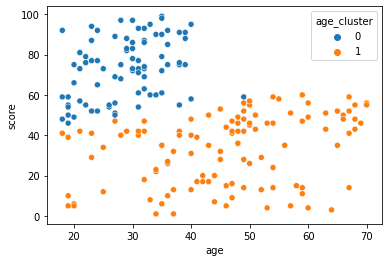

In [21]:
sbn.scatterplot(x='age',y='score',hue='age_cluster',data=df)

In [22]:
kmeans2=KMeans(n_clusters=5)
kmeans2.fit(df[['income','score']])
kmeans2.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [23]:
df['income_cluster']=kmeans2.labels_

In [24]:
df

,CustomerID,gender,age,income,score,age_cluster,income_cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,1,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0
196,197,Female,45,126,28,1,4
197,198,Male,32,126,74,0,0
198,199,Male,32,137,18,1,4


In [25]:
df['income_cluster'].value_counts()

1    81
0    39
4    35
3    23
2    22
Name: income_cluster, dtype: int64

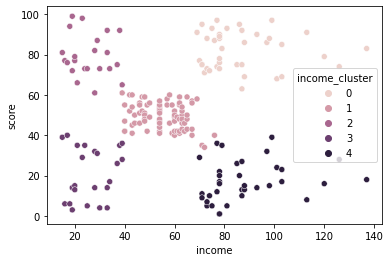

In [26]:
sbn.scatterplot(x='income',y='score',hue='income_cluster',data=df)

In [27]:
from sklearn.cluster import KMeans
K_range=range(1,12)

In [28]:
wcss=[]
for k in K_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['age','score']])
    OMP_NUM_THREADS=1
    wcss.append(km.inertia_)

In [29]:
wcss

[171535.50000000003,
 75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23819.442236543735,
 19566.522341377604,
 15514.19313435103,
 12997.449288119285,
 11629.149118528532,
 10123.09387722686,
 9421.071020546537]

Text(0.5, 1.0, 'Elbow method')

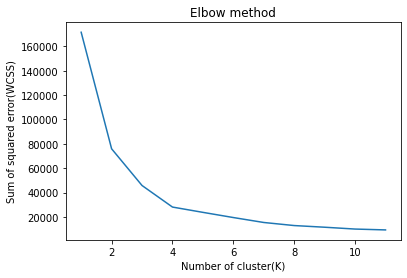

In [30]:
import matplotlib.pyplot as plt
plt.xlabel('Number of cluster(K)')
plt.ylabel('Sum of squared error(WCSS)')
plt.plot(K_range,wcss)
plt.title('Elbow method')